# ADS - Network Analysis Homework

In [1]:
#add necessary libraries
import networkx as nx #library supporting networks
import matplotlib.pyplot as plt #plotting
import pandas as pd
import numpy as np
import scipy.stats as stat
#make sure plots are embedded into the notebook
%pylab inline 
import statsmodels.formula.api as smf

Populating the interactive namespace from numpy and matplotlib


## Problem 1
Visualize the network with node labes and sizes proportional to node degree

In [2]:
#uploading the classical coappearance network of characters in the novel "Les Miserables" to analyze
#first download the data from https://serv.cusp.nyu.edu/files/ADS-2015/NetworkAnalysis/homework1/lesmis.gml
G = nx.read_gml('data/lesmis.gml')

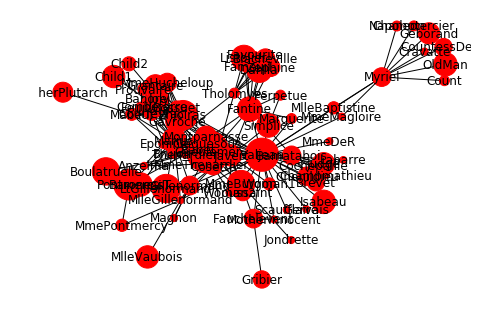

In [3]:
# Code here
np.random.seed(2011)
arr=list(dict(G.degree()).values())
nx.draw(G,node_size=50*np.array(arr),with_labels=True)

## Problem 2
Output the node labels and corresponding centrality measure for top 5 nodes in terms of

a) degree centrality;

b) eigenvector centrality;

c) betweenness centrality;

d) closeness centrality;

In [4]:
def topdict(d,tn,mode):
    ind=sorted(d, key=d.get, reverse=True)
    print('Measure: {0}'.format(mode))
    for i in range(0,tn):
       print('{0}|{1} : {2}'.format(i+1,ind[i],d[ind[i]]))
    print("")
    return ind

In [5]:
#compute centrality measures
mc1=dict(nx.degree(G))
mc2=dict(nx.eigenvector_centrality(G))
mc3=dict(nx.betweenness_centrality(G))
mc4=dict(nx.closeness_centrality(G))

In [6]:
#output top 5 nodes
ind1=topdict(mc1,5,"Degree Centralty") 
print("\n")
ind1=topdict(mc2,5,"Eigenvector Centrality") 
print("\n")
ind1=topdict(mc3,5,"Betweenness Centrality") 
print("\n")
ind1=topdict(mc4,5,"Closeness Centrality")

Measure: Degree Centralty
1|Valjean : 36
2|Gavroche : 22
3|Marius : 19
4|Javert : 17
5|Thenardier : 16



Measure: Eigenvector Centrality
1|Gavroche : 0.3178389397749768
2|Valjean : 0.2676181759885394
3|Enjolras : 0.26717863282356674
4|Marius : 0.25911114534178764
5|Bossuet : 0.2421307863747414



Measure: Betweenness Centrality
1|Valjean : 0.5699890527836183
2|Myriel : 0.17684210526315788
3|Gavroche : 0.16511250242584766
4|Marius : 0.13203248862194597
5|Fantine : 0.1296445409881942



Measure: Closeness Centrality
1|Valjean : 0.6440677966101694
2|Marius : 0.5314685314685315
3|Thenardier : 0.5170068027210885
4|Javert : 0.5170068027210885
5|Gavroche : 0.5135135135135135



## Problem 3

Using the world airport dataset

a) Find connected components, report their number and the sizes.

b) In the largest connected component find top 10 airports by each centrality metric (degree, betweenneass, closeness, pagerank).

c) Find average network distance of the shortest path between all pairs of the airports from the largest connected component.

d) Find average distance among the top 100 airports by degree, betweenness, closeness, pagerank.

In [7]:
cities = pd.read_csv( 'data/citiesTable.csv' , index_col=0 )
cities.head()

,country name,most active airport,long. most active airport,lat. most active airport,number of routes,number incoming flights,number outcoming flights,number incoming domestic flights,number outcoming domestic flights,number incoming international flights,number outcoming international flights,only domestic flights,average distance,max. distance
city name,,,,,,,,,,,,,,
London,United Kingdom,Heathrow,-0.103,51.795,1984,993,992,57,57,936,934,0,3228,11153
Chicago,United States,Chicago Ohare Intl,-87.842,42.631,1406,705,702,526,523,179,178,0,2328,12416
Paris,France,Charles De Gaulle,2.916,49.021,1254,626,629,68,68,558,560,0,3367,11652
Moscow,Russia,Domododevo,38.510,55.681,1179,589,591,231,231,358,359,0,2772,10054
Shanghai,China,Pudong,122.342,31.238,1115,560,556,357,353,203,202,0,2235,12245


In [8]:
Flights=nx.Graph()
Flights.add_nodes_from(cities.index)

In [9]:
#create a dictionary of city locations
CityPos={c:(cities['long. most active airport'][c],cities['lat. most active airport'][c])
         for c in cities.index}

In [10]:
#now read the links
links = pd.read_csv( 'data/citiesToCities.csv' , index_col=None )
links.head()

,departure city,long. departure (decimal),lat. departure (decimal),departure country,arrival city,long. departure (decimal).1,lat. departure (decimal).1,arrival country,number of routes,distance
0,Sao Paulo,-46.116,-23.054,Brazil,Rio De Janeiro,-42.740,-22.682,Brazil,18,348
1,Rio De Janeiro,-42.740,-22.682,Brazil,Sao Paulo,-46.116,-23.054,Brazil,18,348
2,Beijing,116.974,40.133,China,Shanghai,122.342,31.238,China,18,1100
3,Johannesburg,28.410,-25.566,South Africa,Cape Town,19.002,-33.942,South Africa,16,1299
4,Honolulu,-157.871,21.531,United States,Tokyo,140.643,36.274,Japan,16,6103


In [11]:
#create list of edges as tuples
EN=len(links.index)
edgelist=[(links['departure city'][j],links['arrival city'][j],int(links['distance'][j])) for j in range(EN)]

In [12]:
#add edges to the network
Flights.add_weighted_edges_from(edgelist)

#### a) Find connected components, report their number and the sizes.

In [13]:
CC= [c for c in sorted(nx.connected_components(Flights), key=len, reverse=True)]

In [14]:
no_components=len(CC)
no_components

4

In [15]:
for i in range(no_components):
    print("Size of component " + str(i) , len(CC[i]))

Size of component 0 2981
Size of component 1 3
Size of component 2 2
Size of component 3 2


#### b) In the largest connected component find top 10 airports by each centrality metric (degree, betweenneass, closeness, pagerank).

In [16]:
# code here
mc1=dict(nx.degree(nx.subgraph(Flights,CC[0])))

In [17]:
mc2=nx.betweenness_centrality(nx.subgraph(Flights,CC[0]))

In [18]:
mc3=dict(nx.closeness_centrality(nx.subgraph(Flights,CC[0])))

In [19]:
mc4 = nx.pagerank(nx.subgraph(Flights,CC[0]),0.85)

In [20]:
#output top 5 nodes
ind1=topdict(mc1,10,"Degree Centrality") 
print("\n")
ind1=topdict(mc2,10,"Betweenness Centrality") 
print("\n")
ind1=topdict(mc3,10,"Closeness Centrality") 
print("\n")
ind1=topdict(mc4,10,"Pagerank") 

Measure: Degree Centrality
1|London : 311
2|Paris : 267
3|Frankfurt : 232
4|Moscow : 229
5|Atlanta : 208
6|Amsterdam : 208
7|Chicago : 199
8|Beijing : 184
9|Istanbul : 181
10|Dallas-fort Worth : 181



Measure: Betweenness Centrality
1|London : 0.09076727836638471
2|Anchorage : 0.08216371312591933
3|Paris : 0.07784192121669786
4|Moscow : 0.06103801970289898
5|Chicago : 0.058134928351867336
6|Frankfurt : 0.05452341641775669
7|Seattle : 0.05271958560535114
8|Dubai : 0.04644272199874116
9|Tokyo : 0.045854644788206174
10|Toronto : 0.045314665826618084



Measure: Closeness Centrality
1|London : 0.42335559028271064
2|Frankfurt : 0.4174838890445503
3|Paris : 0.41637557635880956
4|Amsterdam : 0.4094531464688101
5|New York : 0.40053763440860213
6|Toronto : 0.39632929910892406
7|Los Angeles : 0.39601328903654487
8|Chicago : 0.3927253558249868
9|Dubai : 0.3926218708827404
10|Newark : 0.38964435146443516



Measure: Pagerank
1|London : 0.012596734404730121
2|Paris : 0.012225257558406744
3|Frankfu

#### c) Find average network distance of the shortest path between all pairs of the airports from the largest connected component.

In [21]:
nx.average_shortest_path_length(nx.subgraph(Flights,CC[0]),weight='weight')

4889.482523318827

#### d) Find average distance among the top 100 airports by degree, betweenness, closeness, pagerank.

In [22]:
CC1= sorted(mc1, key=mc1.get, reverse=True)[0:100]
CC2= sorted(mc2, key=mc2.get, reverse=True)[0:100]
CC3= sorted(mc3, key=mc3.get, reverse=True)[0:100]
CC4= sorted(mc4, key=mc4.get, reverse=True)[0:100]

In [23]:
print("By degree: ",nx.average_shortest_path_length(nx.subgraph(Flights,CC1),weight='weight'))

By degree:  3956.8024242424244


In [24]:
print("By degree: ",nx.average_shortest_path_length(nx.subgraph(Flights,CC2),weight='weight'))

By degree:  5298.190505050505


In [25]:
print("By Closeness: ",nx.average_shortest_path_length(nx.subgraph(Flights,CC3),weight='weight'))

By Closeness:  4651.6824242424245


In [26]:
print("By Pagerank: ",nx.average_shortest_path_length(nx.subgraph(Flights,CC4),weight='weight'))

By Pagerank:  5684.228282828283
